In [1]:
from dataframe_handling import create_df
import numpy as np
# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [2]:
df= create_df()

In [3]:
df.category_name[:10]

0      outdoors/adventure
1         career/business
2                 fitness
3        health/wellbeing
4                    LGBT
5        health/wellbeing
6                   music
7              book clubs
8    new age/spirituality
9         career/business
Name: category_name, dtype: object

In [71]:
import pickle
pickle.dump(df._id,open('lsi_id_df.pkl', "wb" ))

In [73]:
_id_df = pickle.load(open('lsi_id_df.pkl','rb'))

56f31537a8326c050e022304
56f31537a8326c050e022304


In [5]:
df.sponsor_details[2]

[u'San Francisco A List Voted Go WOW Team Best Running Club in the Bay Area',
 u'Stephanie K Atwood Enterprises is the dream business of Founder Stephanie Atwood, offering lifelong fitness to women everywhere through running, walking, and the outdoors. WOW offers all the pieces to all women, all sizes, all shapes, all abilities, to pursue their "athlete within" and discover their true potential. Through neighborhood groups, live support calls, and the 15 minute learning series, you have access to train and grow wherever you live. Join us soon!',
 u'The See Jane Run Half Marathon and 5K are full of chocolate, champagne, and women who can call themselves athletes.',
 u'Train with WOW, get a registration discount for the ORF.',
 nan,
 u"Use the gymboss for many different workouts and times. It's great!"]

In [6]:
additional_stopwords = {'com','www'}

In [7]:
count_vectorizer = CountVectorizer(analyzer='word',
                                  ngram_range=(1, 3), min_df=2,
        stop_words=text.ENGLISH_STOP_WORDS.union(additional_stopwords),
                                  token_pattern='\\b[a-z][a-z]+\\b')

In [8]:
count_vectorizer.fit(df.description.dropna())

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=frozenset(['all', 'show', 'anyway', 'four', 'go', 'mill', 'find', 'seemed', 'whose', 're', 'herself', 'whoever', 'behind', 'should', 'to', 'only', 'under', 'herein', 'do', 'his', 'get', 'very', 'de', 'myself', 'cannot', 'every', 'yourselves', 'him', 'is', 'cry', 'beforehand', 'these', 'sh...ho', 'most', 'eight', 'but', 'nothing', 'why', 'noone', 'sometimes', 'together', 'serious', 'once']),
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
count_vectorizer.vocabulary_

{u'dance clubs': 17292,
 u'process successful': 67369,
 u'related apache apex': 70902,
 u'vote favorite': 88784,
 u'group dedicated building': 33898,
 u'inevitably': 40856,
 u'physically emotionally': 64537,
 u'today public speaking': 84921,
 u'love create': 50373,
 u'travel club': 85778,
 u'south north': 78444,
 u'need girls night': 57772,
 u'share similar interests': 75960,
 u'fitness goals join': 28471,
 u'think friends': 84040,
 u'socials hiking': 77952,
 u'groups yahoo': 35456,
 u'teach different': 82744,
 u'buddies starting': 8438,
 u'meet general': 52893,
 u'positive good': 65941,
 u'valued key': 87807,
 u'hang soon': 36112,
 u'books random': 7580,
 u'potential future': 66221,
 u'welcomed': 90777,
 u'case haven noticed': 10095,
 u'activating': 564,
 u'ancient spiritual teaching': 2339,
 u'welcomes': 90783,
 u'fit': 28423,
 u'fix': 28511,
 u'french spanish english': 30291,
 u'fin': 28233,
 u'performed singing artists': 63899,
 u'clara san': 11697,
 u'open minded individuals': 604

In [10]:
ng_vecs = count_vectorizer.transform(df.description.dropna()).transpose()
vec_sum =ng_vecs.sum(axis=1)

In [11]:
vec_sum.sort()
vec_sum[100:110]

matrix([[2],
        [6],
        [2],
        [2],
        [2],
        [5],
        [2],
        [3],
        [2],
        [2]])

In [12]:
ng_vecs.shape

(93410, 7943)

In [13]:
corpus = matutils.Sparse2Corpus(ng_vecs)

In [14]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.iteritems())

In [15]:
tfidf = models.TfidfModel(corpus)

In [16]:
tfidf_corpus = tfidf[corpus]


In [17]:
lsi = models.LsiModel(tfidf_corpus, id2word=id2word, num_topics=100)

In [18]:
lsi_corpus = lsi[tfidf_corpus]

In [19]:
doc_vecs = [doc for doc in lsi_corpus]


In [20]:
index = similarities.MatrixSimilarity(doc_vecs, num_features=100)

In [21]:
print index[doc_vecs[110]]
print len(index[doc_vecs[110]])
doc_vecs[110][:10]

[ 0.02679681  0.19204032  0.11004034 ...,  0.06610078  0.02541695
  0.13815252]
7943


[(0, 0.10239127243104255),
 (1, 0.046277767734621049),
 (2, 0.024797415193888277),
 (3, -0.02243261636438711),
 (4, 0.036066024730857862),
 (5, 0.026339351177270605),
 (6, 0.064345097227943682),
 (7, 0.00011767557847207222),
 (8, -0.0193537957382677),
 (9, -0.015357105209784649)]

In [22]:
sims = sorted(enumerate(index[doc_vecs[3540]]), key=lambda item: -item[1])

In [23]:
sims

[(3540, 1.0),
 (5886, 0.74949491),
 (6214, 0.74158317),
 (1902, 0.73562509),
 (4547, 0.70576805),
 (2619, 0.69874811),
 (5941, 0.69072604),
 (3505, 0.66864526),
 (4044, 0.667557),
 (7501, 0.63658208),
 (2248, 0.62593162),
 (2328, 0.62223649),
 (3370, 0.60797292),
 (4820, 0.60276961),
 (294, 0.59987265),
 (5639, 0.58530587),
 (156, 0.57479513),
 (3480, 0.57382393),
 (3258, 0.56912363),
 (2029, 0.56213784),
 (1617, 0.55356002),
 (1984, 0.552688),
 (2995, 0.54551268),
 (1285, 0.53526312),
 (3368, 0.53307885),
 (731, 0.5323602),
 (3416, 0.53090608),
 (5912, 0.52927214),
 (1850, 0.52701712),
 (3274, 0.52430987),
 (5991, 0.51691288),
 (5806, 0.51467198),
 (2493, 0.50105143),
 (5080, 0.50052553),
 (5524, 0.49706683),
 (3314, 0.49123576),
 (596, 0.49008206),
 (5136, 0.48736152),
 (3155, 0.48636693),
 (1253, 0.47671115),
 (1462, 0.4727338),
 (1107, 0.46931195),
 (7635, 0.46741492),
 (441, 0.46501493),
 (61, 0.46277794),
 (7031, 0.45925155),
 (6518, 0.45832905),
 (1648, 0.45832041),
 (1668, 0.45

In [24]:
todas =[]
for sim in sims:
    todas.append(sim[0])


In [25]:
for i in todas: 
    print i,df.category_name[i]

3540 tech
5886 tech
6214 tech
1902 sports/recreation
4547 education/learning
2619 sports/recreation
5941 food/drink
3505 book clubs
4044 tech
7501 fitness
2248 sports/recreation
2328 sports/recreation
3370 sports/recreation
4820 tech
294 socializing
5639 career/business
156 movies/film
3480 parents/family
3258 pets/animals
2029 cars/motorcycles
1617 religion/beliefs
1984 socializing
2995 career/business
1285 sci-fi/fantasy
3368 parents/family
731 sports/recreation
3416 games
5912 career/business
1850 movements/politics
3274 socializing
5991 new age/spirituality
5806 food/drink
2493 health/wellbeing
5080 book clubs
5524 tech
3314 games
596 alternative lifestyle
5136 community/environment
3155 language/ethnic identity
1253 food/drink
1462 tech
1107 sports/recreation
7635 dancing
441 tech
61 fitness
7031 fashion/beauty
6518 career/business
1648 cars/motorcycles
1668 career/business
4582 parents/family
3071 movies/film
3425 socializing
3549 tech
458 outdoors/adventure
5840 music
703 movies

In [26]:
df.category_name[456]

u'movements/politics'

## Checking For Metis

In [27]:
texto=['Metis accelerates the careers of data scientists by providing full-time immersive bootcamps,\
evening professional development courses, online training and corporate programs.Train you to think and act like a data scientist.\
Teach you the most essential skills and technologies. Immerse you in real-world, complex problems.Create opportunities to connect with prospective employers.\
Provide you with excellent student support.Inject continual fun, passion, and excitement into your experience at Metis.',
      'big data startups']

texto_galvanize=['Galvanize is where you can become a developer, data scientist, data engineer, or build your tech startup.']

In [28]:
#len(texto.split(' '))

In [29]:
np.array(texto)

array([ 'Metis accelerates the careers of data scientists by providing full-time immersive bootcamps,evening professional development courses, online training and corporate programs.Train you to think and act like a data scientist.Teach you the most essential skills and technologies. Immerse you in real-world, complex problems.Create opportunities to connect with prospective employers.Provide you with excellent student support.Inject continual fun, passion, and excitement into your experience at Metis.',
       'big data startups'], 
      dtype='|S498')

In [30]:
#metis_counts = count_vectorizer.fit(texto)
metis_vecs = count_vectorizer.transform(np.array(texto)).transpose()

In [34]:
import pickle
pickle.dump(count_vectorizer,open( 'count_vectorizer.pkl', "wb" ))

In [36]:
print type(metis_vecs)
print metis_vecs.shape


<class 'scipy.sparse.csc.csc_matrix'>
(93410, 2)


In [37]:
metis_corpus= matutils.Sparse2Corpus(metis_vecs)

In [38]:
count = 0 
while count<1:
    for i in metis_corpus:
        print i
        count+=1

[(221, 1), (510, 1), (516, 1), (7633, 1), (9997, 1), (14260, 1), (14262, 1), (14587, 1), (15312, 1), (15681, 1), (15986, 1), (16142, 1), (16284, 1), (17489, 2), (17580, 1), (17581, 1), (19134, 1), (22705, 1), (24204, 1), (24415, 1), (25502, 1), (25607, 1), (25933, 1), (30803, 1), (39875, 1), (39879, 1), (41182, 1), (48022, 1), (48090, 1), (60264, 1), (60649, 1), (62689, 1), (62697, 1), (67290, 1), (67584, 1), (67613, 1), (68046, 1), (68420, 1), (68495, 1), (68706, 1), (70003, 1), (70118, 1), (74305, 1), (74309, 1), (77189, 1), (80869, 1), (81542, 1), (82731, 1), (83189, 1), (84024, 1), (84314, 1), (85524, 1), (85555, 1), (92425, 1)]
[(6793, 1), (6800, 1), (17489, 1), (80008, 1)]


In [39]:
metis_tfidf_corpus = tfidf[metis_corpus]

In [54]:
tfidf.save('tfidf.pkl')

In [61]:
metis_lsi_corpus = lsi[metis_tfidf_corpus]

In [68]:
lsi.save('lsi')
lsi_corpus.save('lsi_corpus')
tfidf_corpus.save('tfidf_corpus')

In [62]:
metis_doc_vecs = [doc for doc in metis_lsi_corpus]

In [66]:
lsi.projection.u

array([[  6.85233116e-04,  -1.94341184e-04,  -5.68866541e-04, ...,
          1.13228072e-03,   5.23380554e-04,  -1.63436058e-03],
       [  5.98635915e-04,   6.35393727e-05,  -1.28541994e-03, ...,
          2.60891020e-05,  -4.57307617e-04,   2.61978978e-04],
       [  1.26585902e-03,   3.30116791e-03,   2.49161984e-03, ...,
         -4.95265218e-03,   7.39840770e-03,   2.10025581e-03],
       ..., 
       [  3.70524064e-04,  -5.98769175e-04,  -6.71912519e-04, ...,
         -3.51924907e-04,   3.49148257e-05,   7.07840579e-05],
       [  3.51505588e-04,  -7.11738318e-04,  -2.14150893e-04, ...,
          3.64593868e-04,   7.27918976e-04,   5.68028507e-05],
       [  4.51055208e-04,  -1.16217852e-03,  -3.88925439e-04, ...,
          1.14202157e-03,  -1.35645410e-03,   3.89698130e-05]])

In [42]:
#metis_index = similarities.MatrixSimilarity(metis_doc_vecs, num_features=100)

In [59]:
#sims = sorted(enumerate(index[metis_doc_vecs[0]]), key=lambda item: -item[1])
index.num_best=1000
my_index=index[metis_doc_vecs[0]]

In [60]:
index.save('index.pkl')

In [44]:
my_index

[(6238, 0.84378933906555176),
 (6836, 0.80536478757858276),
 (7931, 0.79689425230026245),
 (6690, 0.79617196321487427),
 (7540, 0.78755784034729004),
 (1249, 0.78571981191635132),
 (6802, 0.78294086456298828),
 (5375, 0.78267788887023926),
 (2318, 0.78140252828598022),
 (305, 0.78062623739242554),
 (1058, 0.77870661020278931),
 (4690, 0.77566850185394287),
 (6089, 0.77486574649810791),
 (7127, 0.76716005802154541),
 (5572, 0.76492208242416382),
 (1221, 0.76270771026611328),
 (5343, 0.76186203956604004),
 (2265, 0.76159089803695679),
 (2944, 0.76109158992767334),
 (857, 0.75995361804962158),
 (5205, 0.7594330906867981),
 (1921, 0.75667166709899902),
 (23, 0.75124996900558472),
 (2123, 0.74901241064071655),
 (6978, 0.74866580963134766),
 (866, 0.74584472179412842),
 (7523, 0.74516522884368896),
 (6650, 0.74439406394958496),
 (5588, 0.74343931674957275),
 (1895, 0.7412484884262085),
 (4021, 0.73423522710800171),
 (4648, 0.73285919427871704),
 (4819, 0.72923392057418823),
 (4364, 0.7279235

In [45]:
doc_lengths=[]
for i in my_index:
    try:
        doc = df.description[i[0]].split(' ')
        doc_lengths.append(len(doc))
    except AttributeError:
        continue



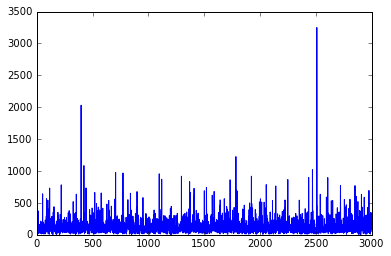

In [46]:
plt.plot(doc_lengths)

In [47]:
_indices=[]
for i in my_index: 
    _indices.append(df.description[i[0]])
    print i,df.category_name[i[0]]
    

(6238, 0.84378933906555176) tech
(6836, 0.80536478757858276) career/business
(7931, 0.79689425230026245) socializing
(6690, 0.79617196321487427) games
(7540, 0.78755784034729004) health/wellbeing
(1249, 0.78571981191635132) tech
(6802, 0.78294086456298828) career/business
(5375, 0.78267788887023926) sci-fi/fantasy
(2318, 0.78140252828598022) tech
(305, 0.78062623739242554) tech
(1058, 0.77870661020278931) tech
(4690, 0.77566850185394287) tech
(6089, 0.77486574649810791) religion/beliefs
(7127, 0.76716005802154541) support
(5572, 0.76492208242416382) health/wellbeing
(1221, 0.76270771026611328) tech
(5343, 0.76186203956604004) support
(2265, 0.76159089803695679) tech
(2944, 0.76109158992767334) tech
(857, 0.75995361804962158) tech
(5205, 0.7594330906867981) sports/recreation
(1921, 0.75667166709899902) tech
(23, 0.75124996900558472) tech
(2123, 0.74901241064071655) tech
(6978, 0.74866580963134766) writing
(866, 0.74584472179412842) tech
(7523, 0.74516522884368896) tech
(6650, 0.74439406

In [48]:
df.description.describe()

count                                                  7943
unique                                                 7895
top       Hi there! Welcomeand glad that you found your ...
freq                                                      7
Name: description, dtype: object

In [49]:
top_docs=pd.Series(_indices)

In [50]:
top_docs.shape

(3000,)

In [51]:
top_docs.dropna().shape

(2998,)

In [52]:
top_docs[top_docs.isnull()]

1586    NaN
2899    NaN
dtype: object

In [53]:
top_docs[19]

u"The vast world of information starts with data. We meet to discuss everything related to data. We will have speakers whom are known to be experts in their field. Meet to get insight into new technologies and to vet out ideas you are working on. Discover new and interesting ways to work with data. Join us and let's have fun discovering data and all that entails."